# XGBoost Book Model Comparison Random Forest

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [4]:
# Load dataset
housingX, housingy = datasets.fetch_california_housing(return_X_y=True, as_frame=True)

In [6]:
housingX.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
housingy.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [10]:
housingX.shape

(20640, 8)

In [12]:
housingX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [14]:
housingX.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


## EDA

<Figure size 2000x2000 with 0 Axes>

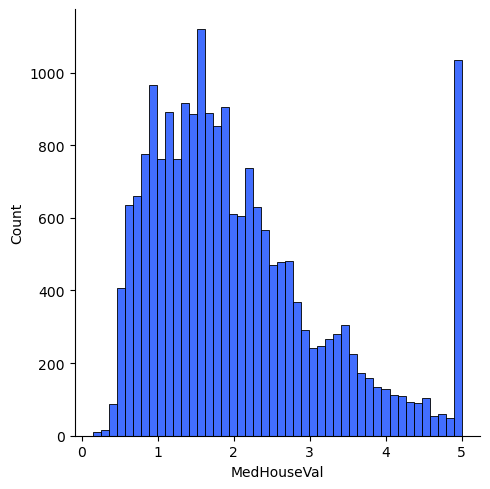

In [17]:
#plt.figure(figsize=(18,10))
plt.figure(figsize=(8,8), dpi=250)
sns.set_palette("bright")
sns.displot(data=housingy, kind='hist');

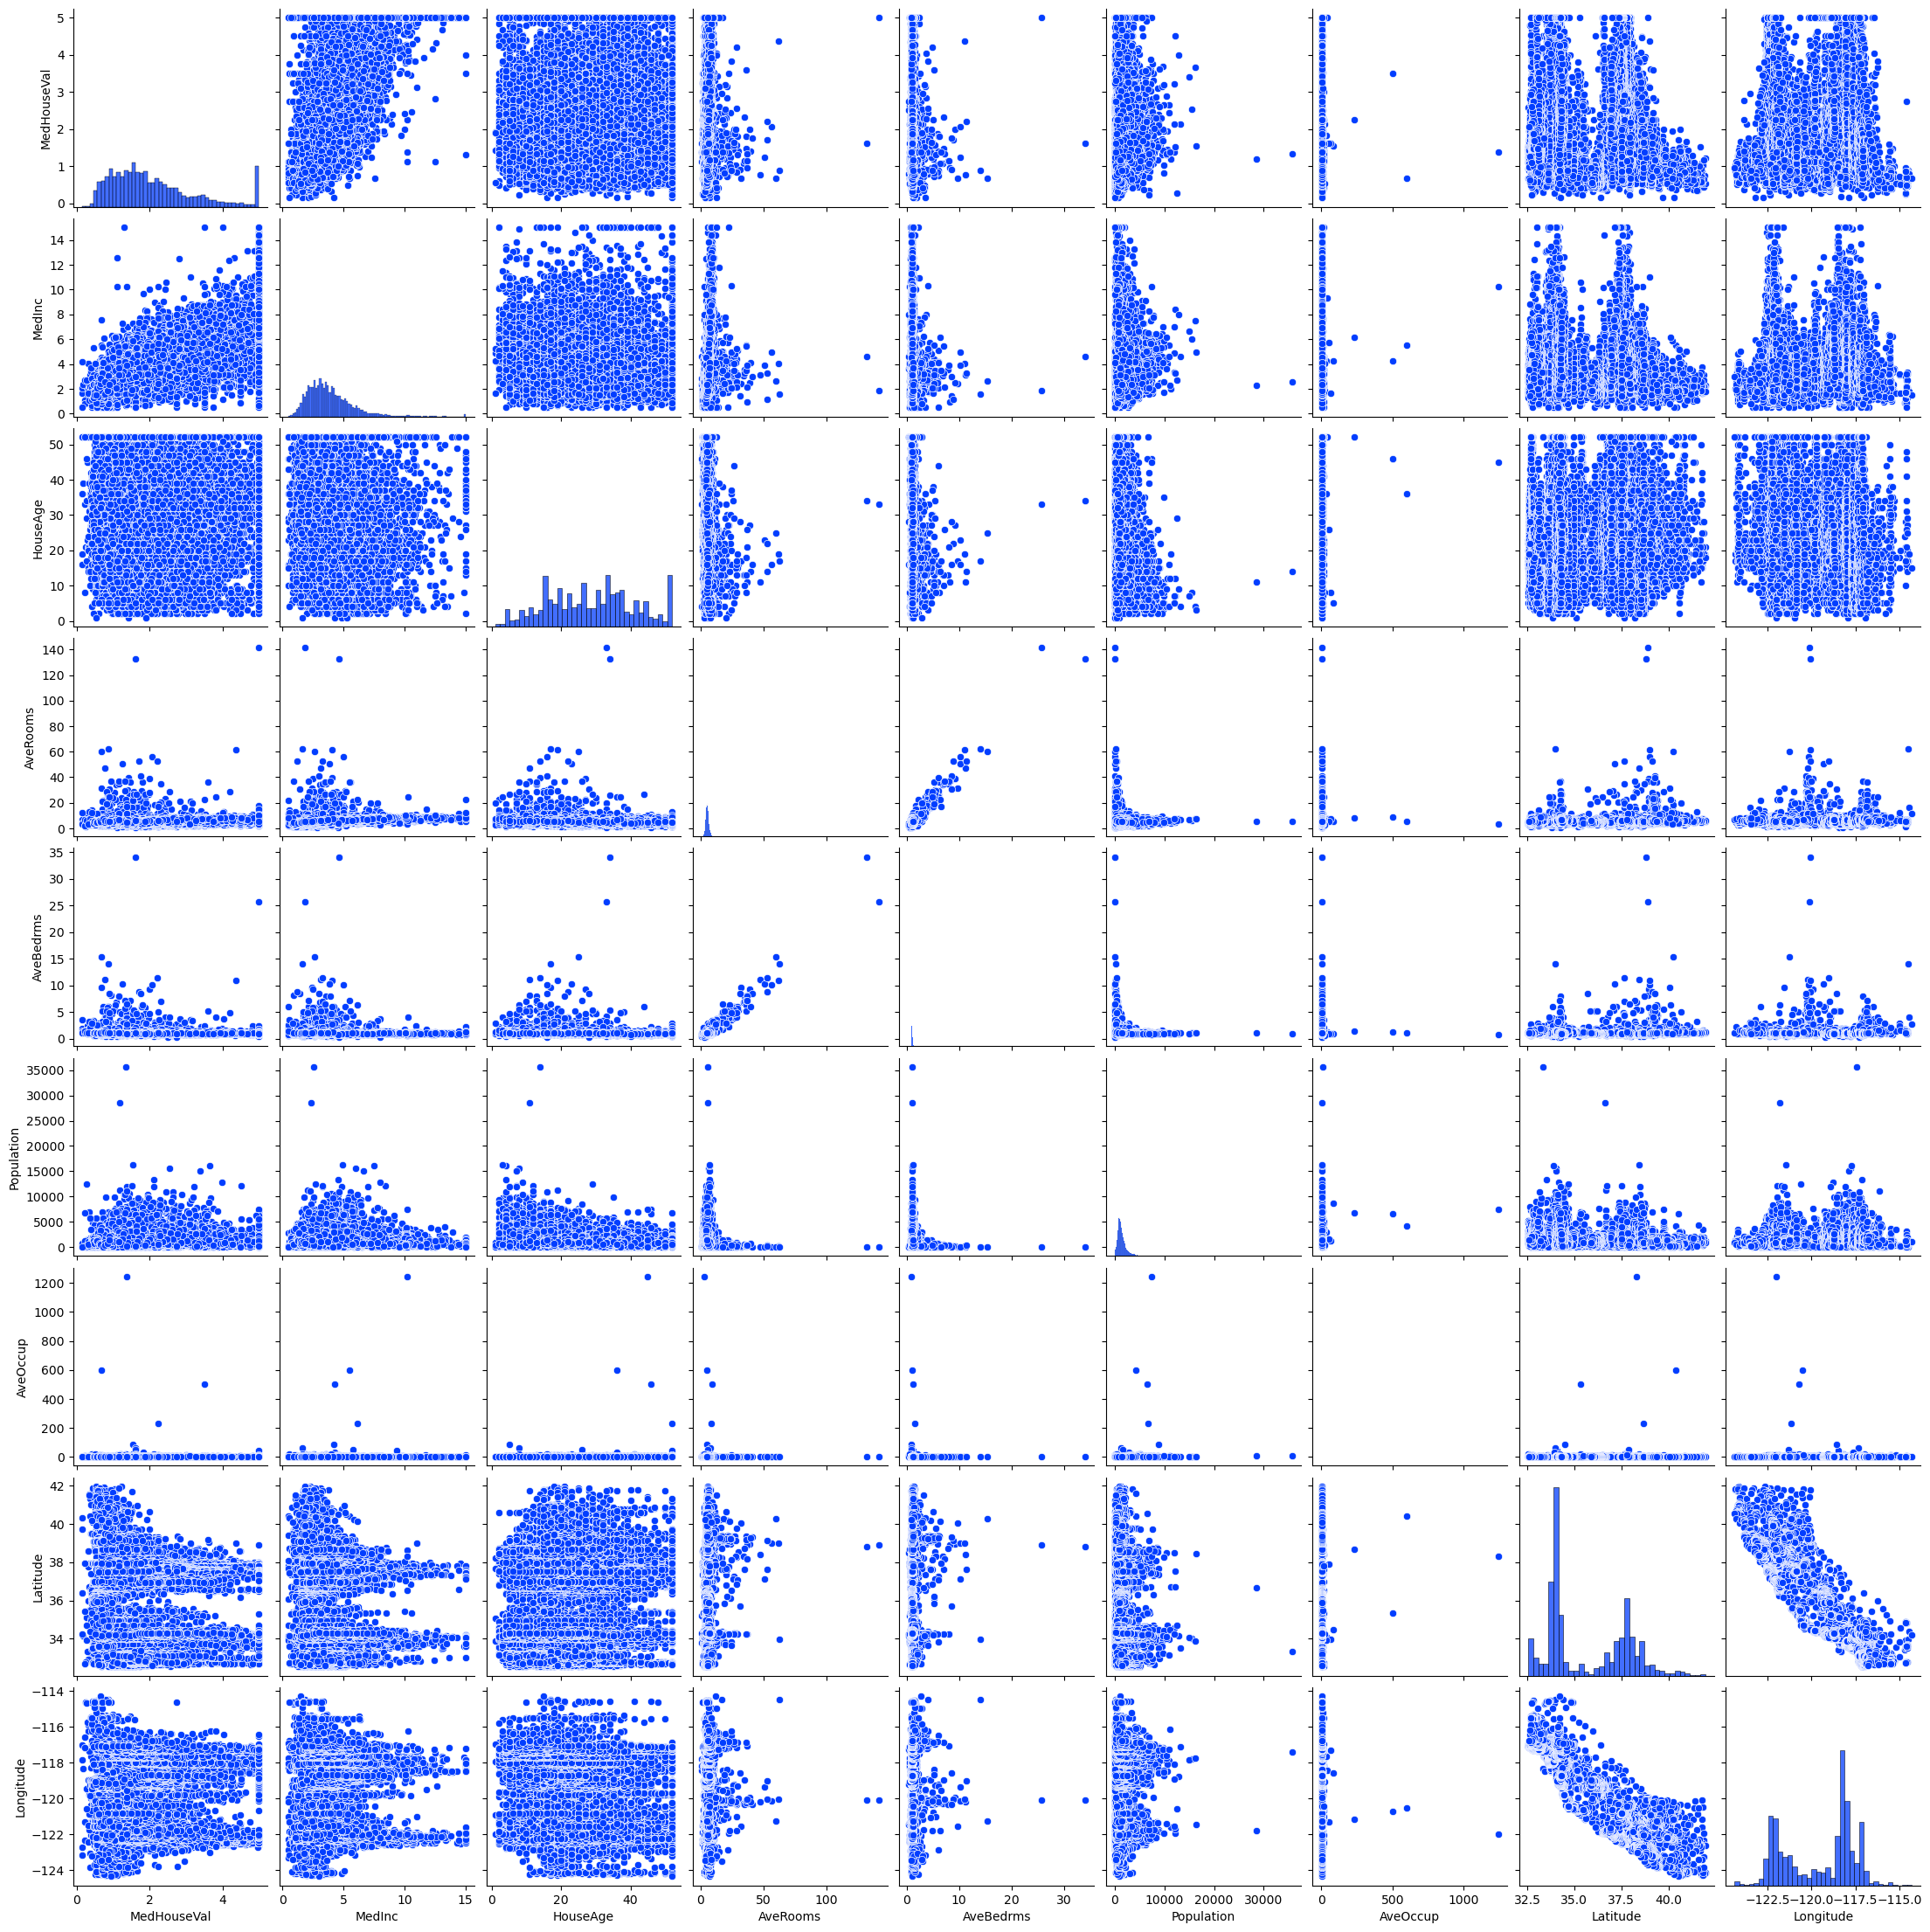

In [19]:
housingxy = pd.concat([housingy, housingX], axis=1)
graphxy = sns.pairplot(housingxy)

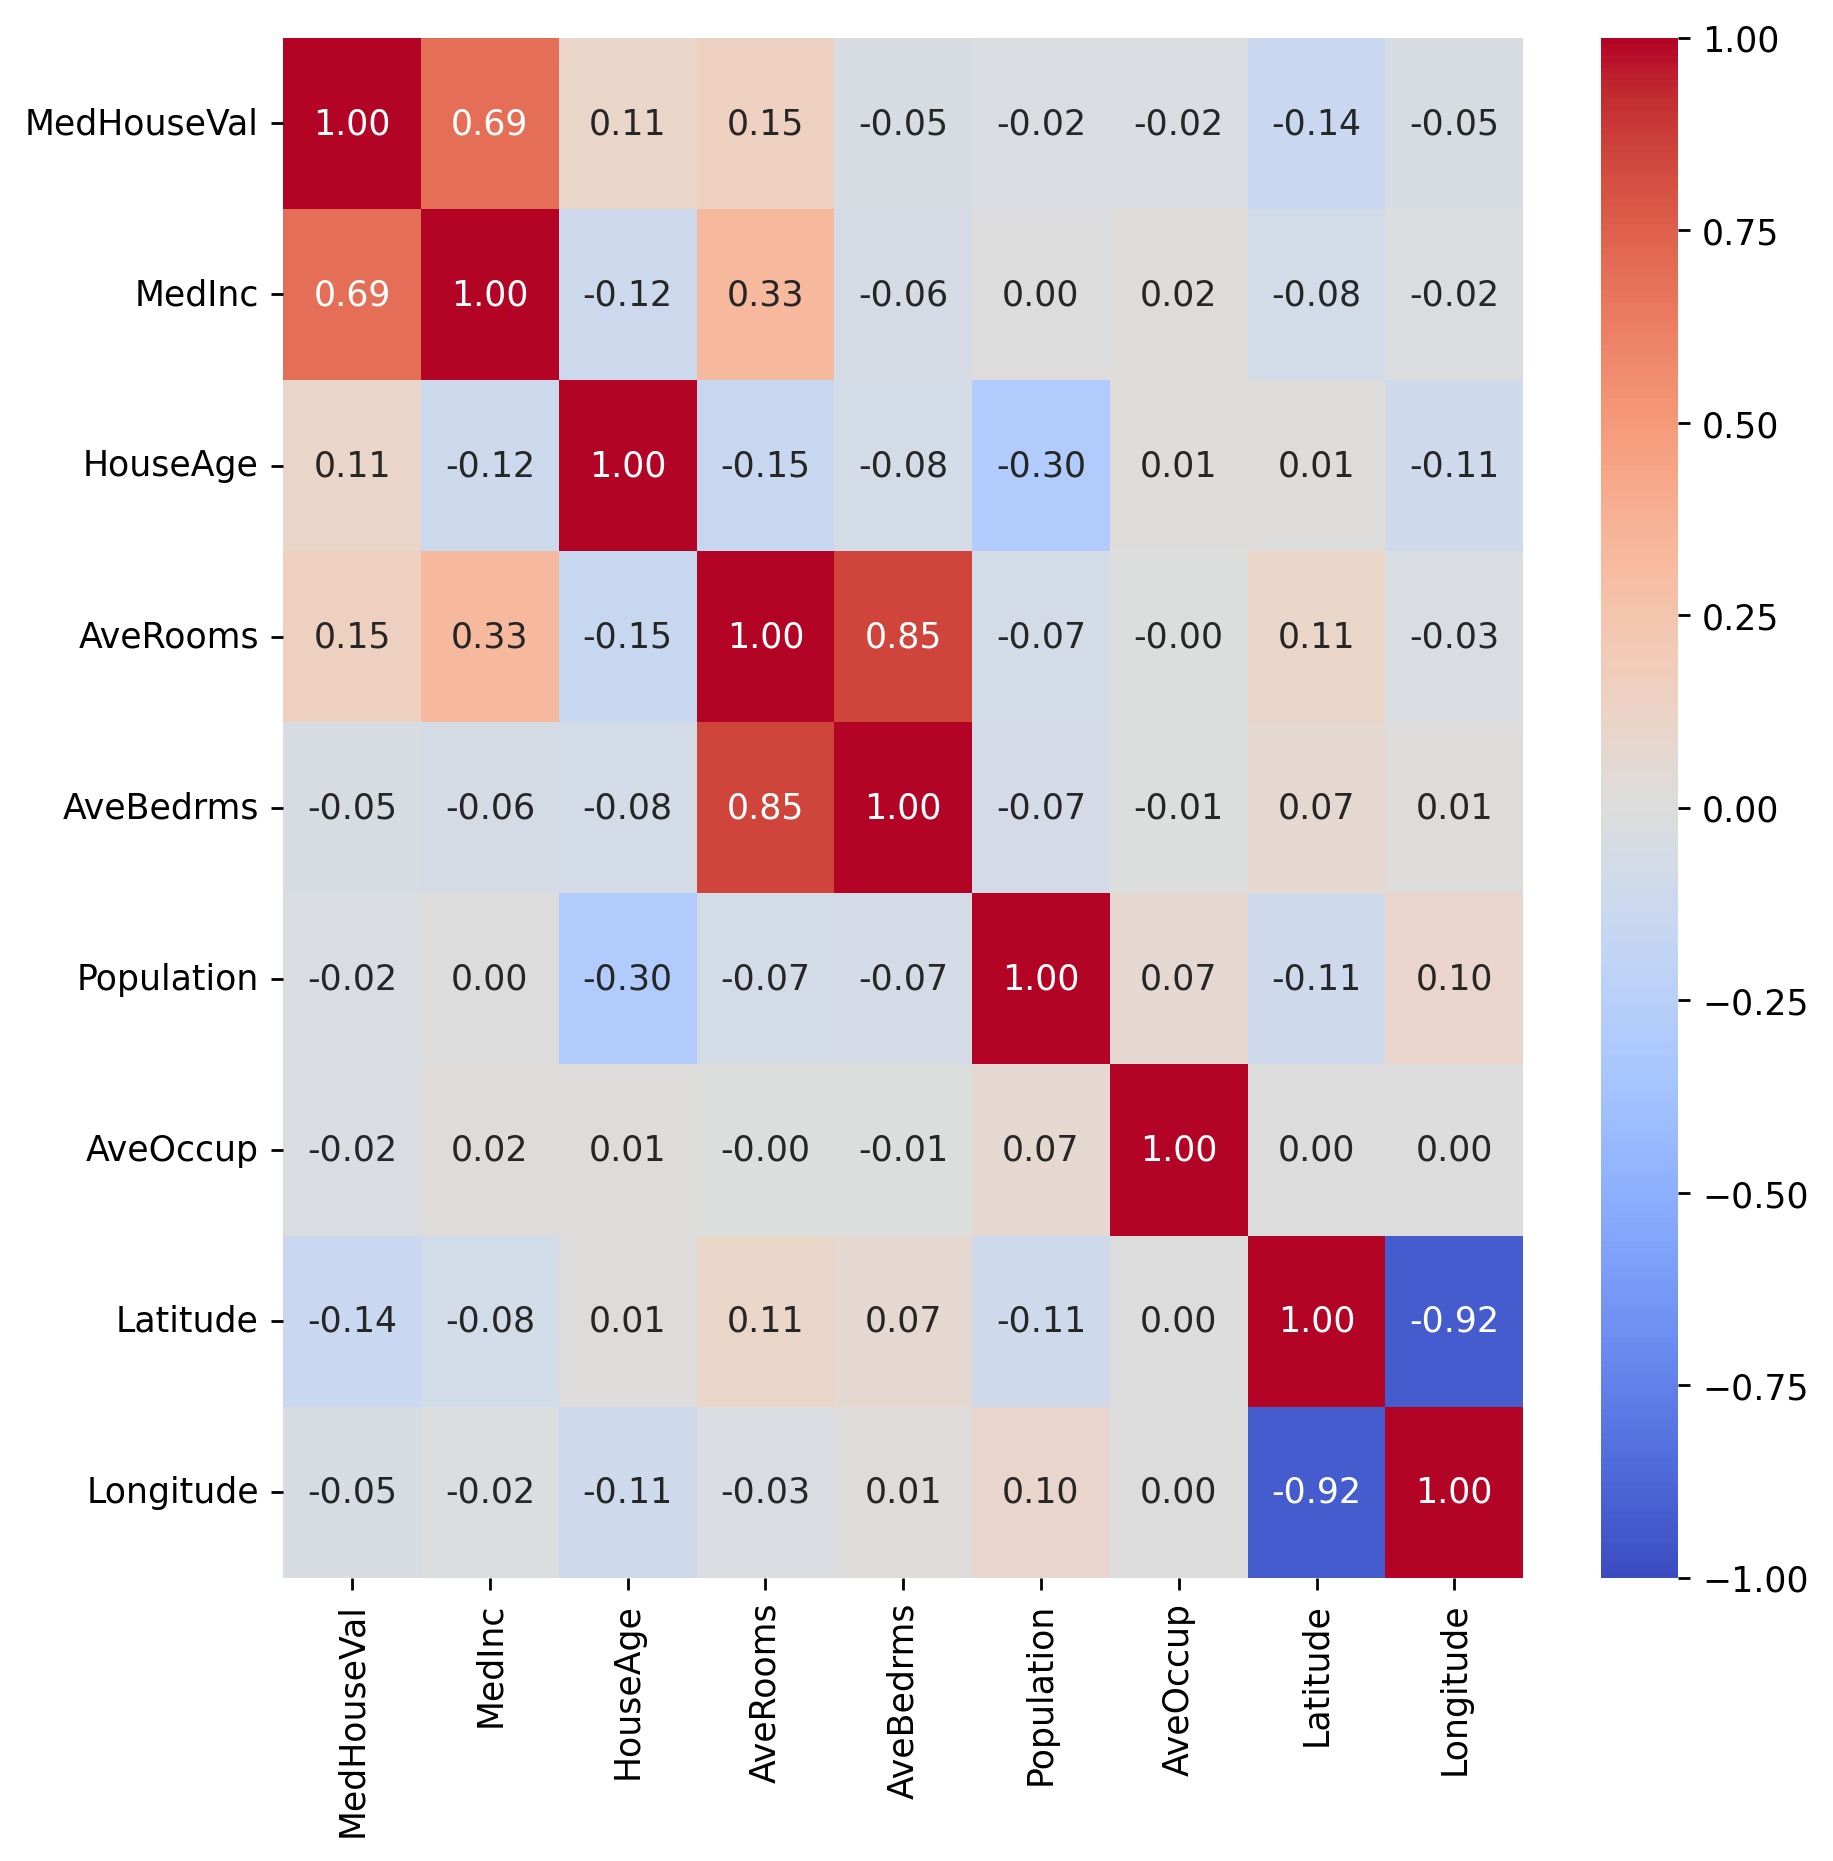

In [21]:
plt.figure(figsize=(8,8), dpi=250)
sns.heatmap(data=housingxy.corr(), cmap='coolwarm', annot=True, vmax=1, vmin=-1, fmt='.2f');

## Data Prep

In [24]:
X_train, X_test, y_train, y_test = train_test_split(housingX, housingy, test_size=0.2, random_state=17)

## Make and Train Model

In [41]:
%%time
housing_rf = RandomForestRegressor(random_state=17)
housing_rf_regression = housing_rf.fit(X_train, y_train)

CPU times: total: 11.3 s
Wall time: 11.3 s


In [31]:
housing_rf_ypred = housing_rf_regression.predict(X_test)

In [35]:
housing_rf_rmse = root_mean_squared_error(y_true=y_test, y_pred = housing_rf_ypred)
print("Linear Regression RMSE is {0:.2f} ".format(housing_rf_rmse))

Linear Regression RMSE is 0.51 


In [37]:
housing_rf_r2 = housing_rf_regression.score(X_test, y_test)
print("Linear Regression R2 is {0:.2f}".format(housing_rf_r2))

Linear Regression R2 is 0.80


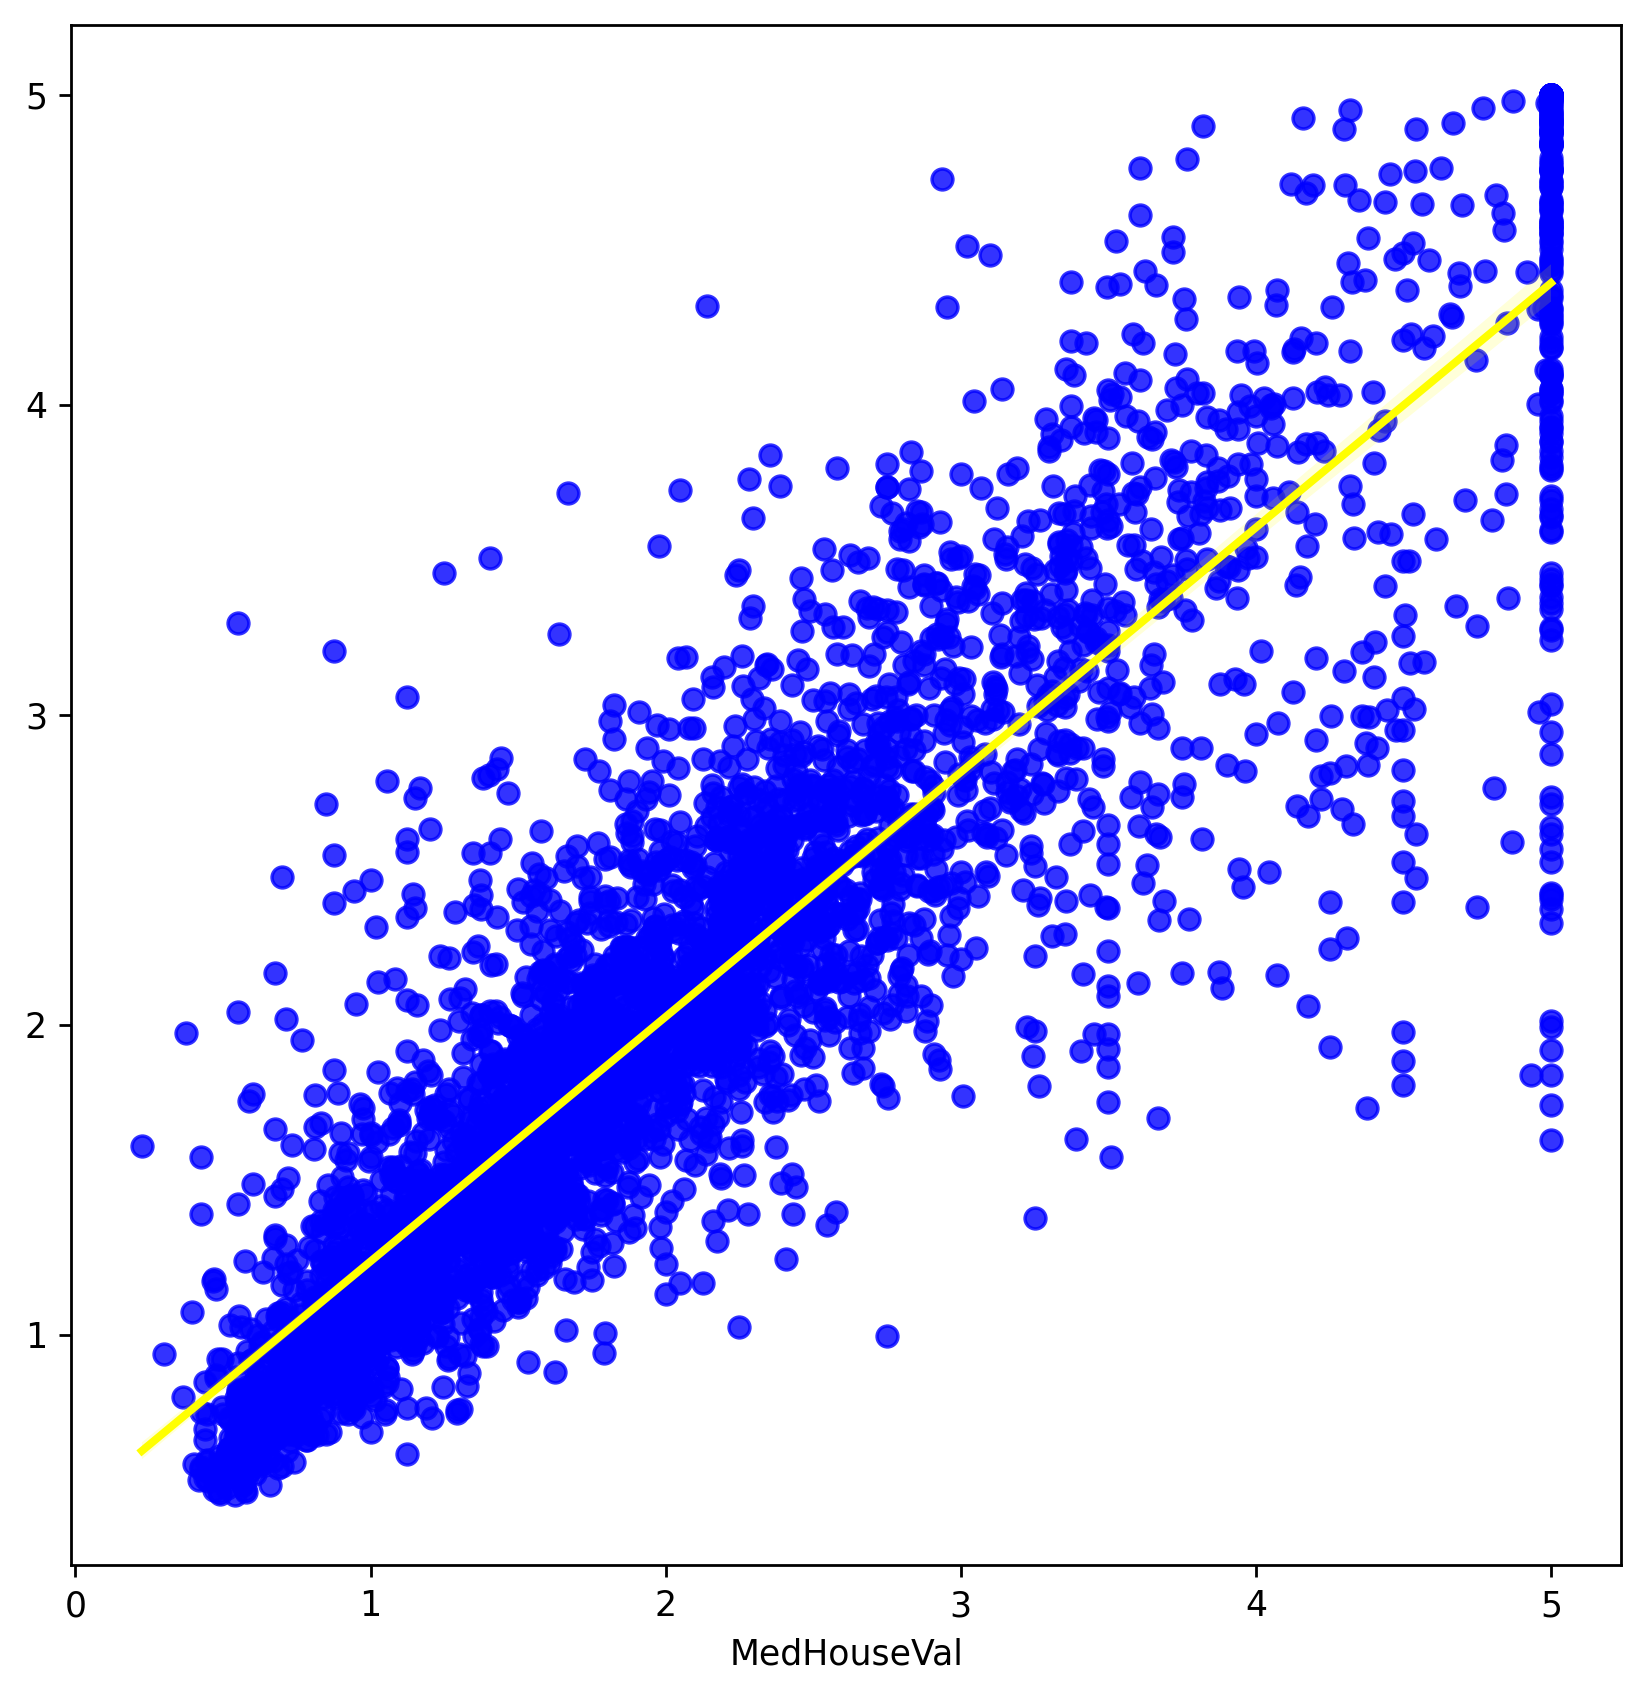

In [39]:
plt.figure(figsize=(8,8), dpi=250)
sns.regplot(x=y_test, y=housing_rf_ypred, scatter_kws={"color":"blue"}, line_kws={"color":"yellow"});